In [84]:
import pandas as pd

seoul = pd.read_csv('seoul.csv', encoding='utf-8')
gyeonggi = pd.read_csv('gyeonggi.csv', encoding='utf-8')
incheon = pd.read_csv('incheon.csv', encoding='utf-8')

In [85]:
seoul

,법정동,계약년도,계약월,평당가격,지역
0,가락동,2020,1,1161.586500,서울
1,가락동,2020,2,1305.935758,서울
2,가락동,2020,3,1099.383636,서울
3,가락동,2020,4,1110.374545,서울
4,가락동,2020,5,1214.206923,서울
...,...,...,...,...,...
14649,흥인동,2024,10,1031.135000,서울
14650,흥인동,2024,11,893.750000,서울
14651,흥인동,2024,12,1208.120000,서울
14652,흥인동,2025,1,1105.435000,서울


In [86]:
gyeonggi

,법정동,계약년도,계약월,평당가격,지역
0,가남읍 신해리,2020,1,183.082000,경기
1,가남읍 신해리,2020,2,177.566000,경기
2,가남읍 신해리,2020,3,184.881000,경기
3,가남읍 신해리,2020,4,175.570000,경기
4,가남읍 신해리,2020,5,179.798889,경기
...,...,...,...,...,...
30126,회정동,2024,10,431.962500,경기
30127,회정동,2024,11,327.985000,경기
30128,회정동,2024,12,289.285000,경기
30129,회정동,2025,1,429.046667,경기


In [87]:
incheon

,법정동,계약년도,계약월,평당가격,지역
0,가정동,2020,1,394.896200,인천
1,가정동,2020,2,450.272586,인천
2,가정동,2020,3,327.976406,인천
3,가정동,2020,4,255.996857,인천
4,가정동,2020,5,335.192093,인천
...,...,...,...,...,...
4693,효성동,2024,10,436.586596,인천
4694,효성동,2024,11,381.005152,인천
4695,효성동,2024,12,432.041667,인천
4696,효성동,2025,1,378.685909,인천


In [88]:
real_price = pd.concat([seoul, gyeonggi, incheon], ignore_index=True)
real_price

,법정동,계약년도,계약월,평당가격,지역
0,가락동,2020,1,1161.586500,서울
1,가락동,2020,2,1305.935758,서울
2,가락동,2020,3,1099.383636,서울
3,가락동,2020,4,1110.374545,서울
4,가락동,2020,5,1214.206923,서울
...,...,...,...,...,...
49478,효성동,2024,10,436.586596,인천
49479,효성동,2024,11,381.005152,인천
49480,효성동,2024,12,432.041667,인천
49481,효성동,2025,1,378.685909,인천


In [89]:
# 공급금액_평당가격 불러오기
original_price = pd.read_csv('공급금액_평당가격.csv', encoding='cp949')
original_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18860 entries, 0 to 18859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공고번호          18860 non-null  int64  
 1   공급금액(최고가 기준)  15422 non-null  float64
 2   공급금액_평당가격     15422 non-null  float64
 3   주택명           18860 non-null  object 
 4   계약연도          18860 non-null  int64  
 5   계약월           18860 non-null  int64  
 6   공급지역명         18860 non-null  object 
 7   전용면적          18860 non-null  int64  
 8   시군구           18820 non-null  object 
 9   읍면동           18820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.4+ MB


In [90]:
# 동 별 평당가격 평균 구하기
original_price.head()

,공고번호,공급금액(최고가 기준),공급금액_평당가격,주택명,계약연도,계약월,공급지역명,전용면적,시군구,읍면동
0,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동
1,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동
2,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동
3,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동
4,2024000706,59115.0,788.20,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동


In [91]:
import numpy as np

def calc_price(row):
    dong = row['읍면동']
    year = row['계약연도']
    month = row['계약월']
    area = row['공급지역명']

    real_price_value = real_price[
        (real_price['법정동'] == dong) & 
        (real_price['계약년도'] == year) & 
        (real_price['계약월'] == month) & 
        (real_price['지역'] == area)].reset_index(drop=True)

    if len(real_price_value) == 0:
        return np.nan
    
    real_price_value = real_price_value['평당가격'][0]

    return real_price_value

original_price['실거래가'] = original_price.apply(calc_price, axis=1)

In [92]:
original_price['실거래가'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5640\4192204184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_price['실거래가'].fillna(0, inplace=True)


In [93]:
original_price

,공고번호,공급금액(최고가 기준),공급금액_평당가격,주택명,계약연도,계약월,공급지역명,전용면적,시군구,읍면동,실거래가
0,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0
1,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0
2,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0
3,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0
4,2024000706,59115.0,788.20,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18855,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0
18856,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0
18857,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0
18858,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0


In [94]:
original_price['시세차익'] =  original_price['실거래가'] - original_price['공급금액_평당가격']

In [95]:
original_price['시세차익'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5640\3155226453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_price['시세차익'].fillna(0, inplace=True)


In [96]:
original_price['매물_시세차익'] = original_price['시세차익'] * original_price['전용면적']

In [81]:
original_price[original_price['매물_시세차익'] > 0]

,공고번호,공급금액(최고가 기준),공급금액_평당가격,주택명,계약연도,계약월,공급지역명,전용면적,시군구,읍면동,실거래가,시세차익,매물_시세차익
156,2024000664,53690.0,639.166667,평택 고덕국제신도시 A50블록 미래도 파밀리에(본청약),2024,12,경기,84,평택시,고덕동,697.373056,58.206389,4889.336667
157,2024000664,53690.0,639.166667,평택 고덕국제신도시 A50블록 미래도 파밀리에(본청약),2024,12,경기,84,평택시,고덕동,697.373056,58.206389,4889.336667
158,2024000664,53690.0,639.166667,평택 고덕국제신도시 A50블록 미래도 파밀리에(본청약),2024,12,경기,84,평택시,고덕동,697.373056,58.206389,4889.336667
159,2024000664,53690.0,639.166667,평택 고덕국제신도시 A50블록 미래도 파밀리에(본청약),2024,12,경기,84,평택시,고덕동,697.373056,58.206389,4889.336667
160,2024000664,53690.0,639.166667,평택 고덕국제신도시 A50블록 미래도 파밀리에(본청약),2024,12,경기,84,평택시,고덕동,697.373056,58.206389,4889.336667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18571,2020000312,165300.0,1967.857143,르엘 신반포,2020,4,서울,54,서초구,잠원동,2315.942222,348.085079,18796.594286
18572,2020000312,167200.0,1990.476190,르엘 신반포,2020,4,서울,54,서초구,잠원동,2315.942222,325.466032,17575.165714
18573,2020000312,167200.0,1990.476190,르엘 신반포,2020,4,서울,54,서초구,잠원동,2315.942222,325.466032,17575.165714
18574,2020000312,167200.0,1990.476190,르엘 신반포,2020,4,서울,54,서초구,잠원동,2315.942222,325.466032,17575.165714


<Axes: xlabel='매물_시세차익', ylabel='Count'>

c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\even

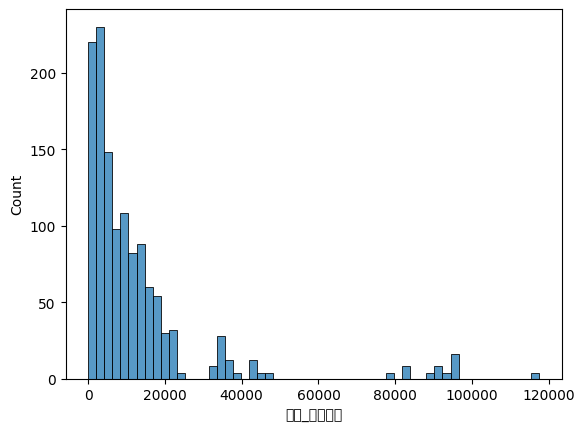

In [97]:
import seaborn as sns

sns.histplot(original_price[original_price['매물_시세차익'] > 0], x='매물_시세차익')

In [83]:
original_price

,공고번호,공급금액(최고가 기준),공급금액_평당가격,주택명,계약연도,계약월,공급지역명,전용면적,시군구,읍면동,실거래가,시세차익,매물_시세차익
0,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0,-885.56,-66417.0
1,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0,-885.56,-66417.0
2,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0,-885.56,-66417.0
3,2024000706,66417.0,885.56,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0,-885.56,-66417.0
4,2024000706,59115.0,788.20,의왕 월암지구 대방 디에트르 레이크파크,2025,1,경기,75,의왕시,월암동,0.0,-788.20,-59115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0,0.00,0.0
18856,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0,0.00,0.0
18857,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0,0.00,0.0
18858,2020000009,NaN,NaN,의왕 오전 동아루미체,2020,2,경기,74,의왕시,전주남이길,0.0,0.00,0.0


In [32]:
# 실거래가_평당가격으로 칼럼명 변경
real_price = real_price.rename(columns={'평당가격' : '실거래가_평당가격'})
real_price

,법정동,계약년도,계약월,실거래가_평당가격,지역
0,가락동,2020,1,1161.586500,서울
1,가락동,2020,2,1305.935758,서울
2,가락동,2020,3,1099.383636,서울
3,가락동,2020,4,1110.374545,서울
4,가락동,2020,5,1214.206923,서울
...,...,...,...,...,...
49478,효성동,2024,10,436.586596,인천
49479,효성동,2024,11,381.005152,인천
49480,효성동,2024,12,432.041667,인천
49481,효성동,2025,1,378.685909,인천


In [ ]:
# df_original_price = original_price.groupby(["읍면동", "계약연도", "계약월", "공급지역명"], as_index=False).agg({"공급금액_평당가격": "mean"})
# df_original_price.rename(columns={"공급지역명": "지역", "읍면동" : "법정동", "계약연도":"계약년도"}, inplace=True)
# df_original_price

,법정동,계약년도,계약월,지역,공급금액_평당가격
0,24-41번지,2021,3,경기,519.976291
1,330-1번지,2020,12,경기,483.432800
2,396-11번지,2021,11,인천,1214.445671
3,4.19로9길,2020,11,서울,801.538292
4,532-2번지,2022,11,경기,718.135593
...,...,...,...,...,...
659,효성동,2023,9,인천,708.937915
660,효성동,2024,8,인천,783.086200
661,후정동로25번길,2020,6,인천,636.120018
662,휘경동,2023,4,서울,1253.900995


In [33]:
# 실거래가와 분양가 평당가격 법정동 별로 합치기
df_price = pd.merge(real_price, df_original_price, on=["법정동", "계약년도", "계약월", "지역"], how="left")
df_price

,법정동,계약년도,계약월,실거래가_평당가격,지역,공급금액_평당가격
0,가락동,2020,1,1161.586500,서울,NaN
1,가락동,2020,2,1305.935758,서울,NaN
2,가락동,2020,3,1099.383636,서울,NaN
3,가락동,2020,4,1110.374545,서울,NaN
4,가락동,2020,5,1214.206923,서울,NaN
...,...,...,...,...,...,...
49478,효성동,2024,10,436.586596,인천,NaN
49479,효성동,2024,11,381.005152,인천,NaN
49480,효성동,2024,12,432.041667,인천,NaN
49481,효성동,2025,1,378.685909,인천,NaN


In [37]:
df_price.query("법정동 == '서초동'")

,법정동,계약년도,계약월,실거래가_평당가격,지역,공급금액_평당가격
6641,서초동,2020,1,1254.180926,서울,NaN
6642,서초동,2020,2,1337.889844,서울,NaN
6643,서초동,2020,3,1149.872432,서울,NaN
6644,서초동,2020,4,1464.548696,서울,NaN
6645,서초동,2020,5,1479.424667,서울,NaN
...,...,...,...,...,...,...
6698,서초동,2024,10,2353.553261,서울,NaN
6699,서초동,2024,11,2252.365672,서울,NaN
6700,서초동,2024,12,2725.379756,서울,NaN
6701,서초동,2025,1,2404.320851,서울,NaN


In [38]:
# 시세차익 칼럼 추가
df_price['시세차익'] = df_price['실거래가_평당가격'] - df_price['공급금액_평당가격']
df_price

,법정동,계약년도,계약월,실거래가_평당가격,지역,공급금액_평당가격,시세차익
0,가락동,2020,1,1161.586500,서울,NaN,NaN
1,가락동,2020,2,1305.935758,서울,NaN,NaN
2,가락동,2020,3,1099.383636,서울,NaN,NaN
3,가락동,2020,4,1110.374545,서울,NaN,NaN
4,가락동,2020,5,1214.206923,서울,NaN,NaN
...,...,...,...,...,...,...,...
49478,효성동,2024,10,436.586596,인천,NaN,NaN
49479,효성동,2024,11,381.005152,인천,NaN,NaN
49480,효성동,2024,12,432.041667,인천,NaN,NaN
49481,효성동,2025,1,378.685909,인천,NaN,NaN
